# PRÉ PROCESSAMENTO DE DADOS 

In [224]:
import pandas as pd
import numpy as np 

In [225]:
df = pd.read_csv('../data/HeartDisease/cardio-train.csv')

In [226]:
df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [227]:
df.drop('id', axis=1, inplace=True)

In [228]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


(70000, 12)

In [229]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [230]:
df['cardio'].value_counts()

cardio
0    35021
1    34979
Name: count, dtype: int64

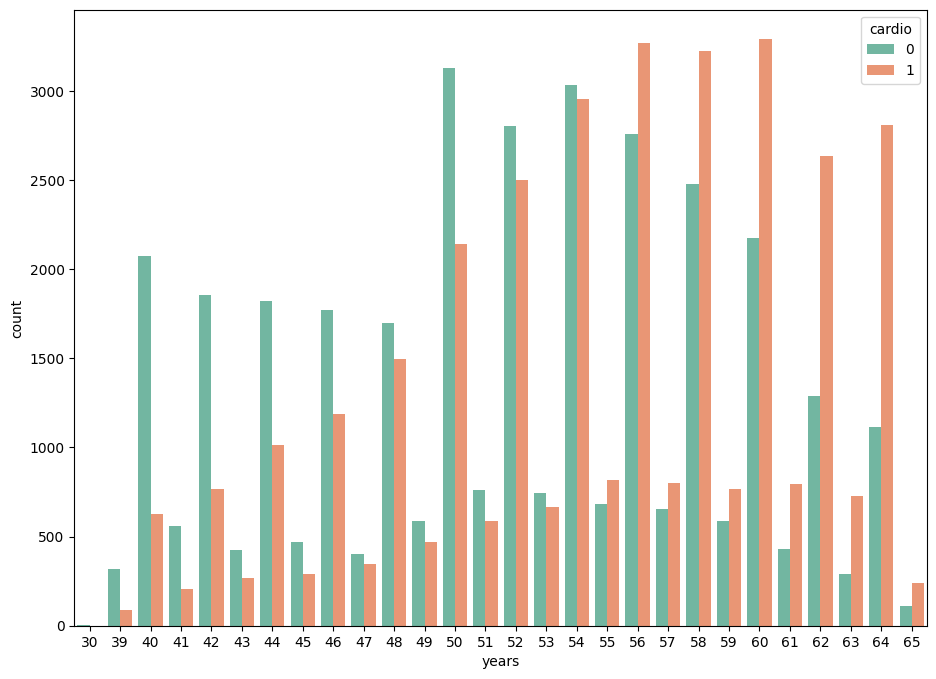

In [231]:
import seaborn as sns
from matplotlib import pyplot as plt
import os
from matplotlib import rcParams

rcParams['figure.figsize'] = 11, 8
df['years'] = (df['age'] / 365).round().astype('int')
sns.countplot(x='years', hue='cardio', data = df, palette="Set2");

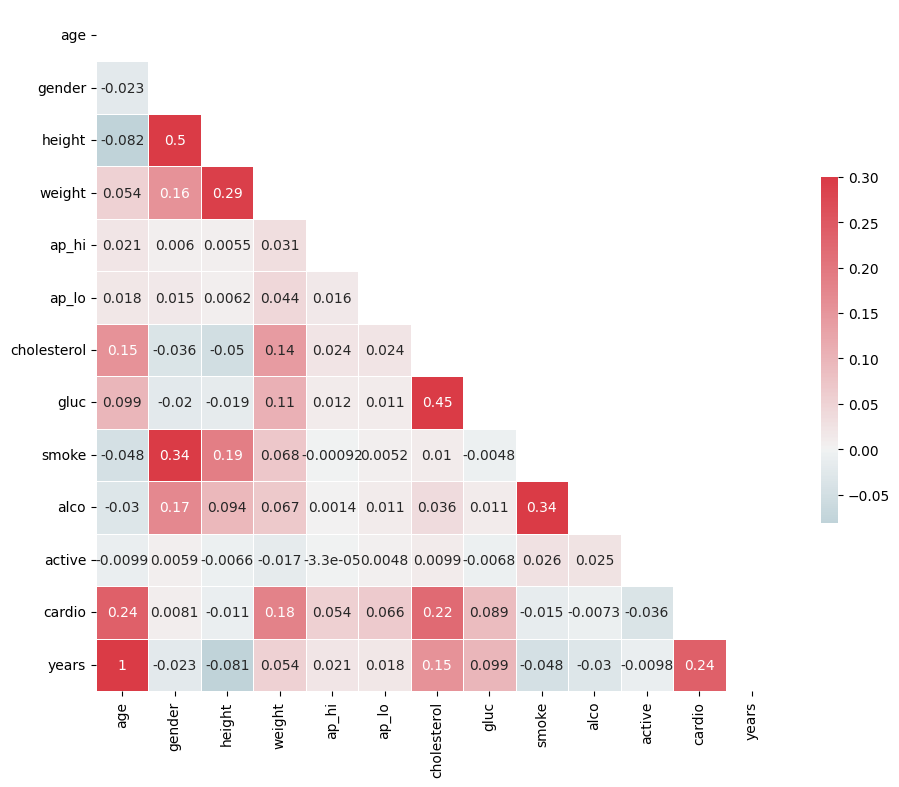

In [232]:
corr = df.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [248]:
df.drop(columns=['gender'], inplace=True)
df.drop(columns=['alco'], inplace=True)
df.drop(columns=['smoke'], inplace=True)

In [249]:
df.head(10)

,height,weight,ap_hi,ap_lo,cholesterol,gluc,active,cardio,years
0,168,62.0,110,80,1,1,1,0,50
1,156,85.0,140,90,3,1,1,1,55
2,165,64.0,130,70,3,1,0,1,52
3,169,82.0,150,100,1,1,1,1,48
4,156,56.0,100,60,1,1,0,0,48
5,151,67.0,120,80,2,2,0,0,60
6,157,93.0,130,80,3,1,1,0,61
7,178,95.0,130,90,3,3,1,1,62
8,158,71.0,110,70,1,1,1,0,48
9,164,68.0,110,60,1,1,0,0,54


# MODELO 

In [251]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.model_selection import train_test_split

In [252]:
X = df.drop(columns=['cardio'])
y = df['cardio']


In [253]:
X.head(5)

,height,weight,ap_hi,ap_lo,cholesterol,gluc,active,years
0,168,62.0,110,80,1,1,1,50
1,156,85.0,140,90,3,1,1,55
2,165,64.0,130,70,3,1,0,52
3,169,82.0,150,100,1,1,1,48
4,156,56.0,100,60,1,1,0,48


In [254]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [287]:
model = Sequential([
  Dense(8, input_shape=(8,), activation='relu'),
  BatchNormalization(),
  Dropout(0.5),
  
  # Dense(5, activation='relu'),
  # BatchNormalization(),
  # Dropout(0.5),
  
  Dense(5, activation='relu'),
  Dense(1, activation='sigmoid')  
])

C:\Users\muril\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [288]:
model.compile(optimizer=Adam(learning_rate=0.008),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [289]:
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
    EarlyStopping(monitor='val_loss', patience=5, verbose=1)
]

In [290]:
model.fit(X_train, y_train,
          batch_size=100,
          epochs=30,
          verbose=1)

Epoch 1/30
560/560 ━━━━━━━━━━━━━━━━━━━━ 2s 959us/step - accuracy: 0.6656 - loss: 0.6236
Epoch 2/30
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 877us/step - accuracy: 0.7145 - loss: 0.5793
Epoch 3/30
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 887us/step - accuracy: 0.7116 - loss: 0.5806
Epoch 4/30
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 896us/step - accuracy: 0.7106 - loss: 0.5779
Epoch 5/30
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 917us/step - accuracy: 0.7159 - loss: 0.5710
Epoch 6/30
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 882us/step - accuracy: 0.7132 - loss: 0.5734
Epoch 7/30
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 896us/step - accuracy: 0.7121 - loss: 0.5736
Epoch 8/30
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 980us/step - accuracy: 0.7113 - loss: 0.5782
Epoch 9/30
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 881us/step - accuracy: 0.7152 - loss: 0.5739
Epoch 10/30
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 907us/step - accuracy: 0.7102 - loss: 0.5752
Epoch 11/30
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 905us/step - accuracy: 0.7132 - loss: 0.5733
Epoch 12/30
560/560 ━━━━━━━━━━